In [4]:
import pandas as pd
from tqdm import tqdm
# import gensim
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
# os.chdir(r"D://Proposal_Defense//Simulations")
# from Utils.Script_utils import get_data_splits, first_LSTM_training, get_data_splits_old_algo
from joblib import Parallel, delayed
import sys
from scipy.stats import norm

In [5]:
# Seed value
# Apparently you may use different seed values at each stage
seed_value= 42

# 1. Set the `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed_value)

# 2. Set the `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)

# 3. Set the `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)

# # 4. Set the `tensorflow` pseudo-random generator at a fixed value
import tensorflow as tf
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

if tf.test.gpu_device_name():
    print('GPU found')
else:
    print("No GPU found")
# tf.config.set_visible_devices([], 'GPU')

from tqdm.notebook import tqdm
tf.random.set_seed(seed_value)
import multiprocessing
# for later versions: 
# tf.compat.v1.set_random_seed(seed_value)

# 5. Configure a new global `tensorflow` session
# from keras import backend as K
# session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
# sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
# K.set_session(sess)

No GPU found


In [6]:
import matplotlib.pyplot as plt

import pickle

In [ ]:
# data["high_level_substr"].value_counts()

In [ ]:
# alginate_doc2vec_vecs

In [ ]:
# data["high_level_substr"].value_counts()

In [7]:
path = os.getcwd() + "//dataset_1"

In [8]:
# ## read in all the drug features
# ## for train test and valid
train_drugs = np.load(path + "//" + "train_drug.npy")
# valid_drugs = np.load(path + "//" + "valid_drug.npy")
# test_drugs = np.load(path + "//" + "test_drug.npy")

In [9]:
# ## read in all the omics features
# ## for train test and valid
train_omics = np.load(path + "//" + "train_omics.npy")
# valid_omics = np.load(path + "//" + "valid_omics.npy")
# test_omics = np.load(path + "//" + "test_omics.npy")

In [ ]:
# ## read in all the labels 
# ## for train test and valid
# y_train = np.load(path + "//" + "train_y.npy")
# y_valid = np.load(path + "//" + "valid_y.npy")
# y_test = np.load(path + "//" + "test_y.npy")

In [ ]:
# train_drugs.shape

In [ ]:
# valid_drugs.shape

In [ ]:
# test_drugs.shape

In [ ]:
# y_train.shape

In [ ]:
# y_valid.shape

In [ ]:
# y_test.shape

In [10]:
def ann(hidden = 10): 
    input_layer = tf.keras.layers.Input(shape = (X_train_word2vec.shape[1]))
    hidden_layer = tf.keras.layers.Dense(hidden)
    hidden_output = hidden_layer(input_layer)
    pred_layer = tf.keras.layers.Dense(1)
    pred_output = pred_layer(hidden_output)
#     pred_output = tf.keras.layers.Activation("softmax")(pred_output)
    model = tf.keras.models.Model(input_layer, pred_output)
    return model

In [11]:
X_train_word2vec = train_drugs

In [12]:
h1, h2 = 16,16

In [13]:


ann_15 = ann(h1)


# In[35]:


# ann_15.summary()


# In[36]:



In [14]:
ann_15.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 90)]              0         
                                                                 
 dense (Dense)               (None, 16)                1456      
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1,473
Trainable params: 1,473
Non-trainable params: 0
_________________________________________________________________


In [15]:
X_train_word2vec = train_omics

In [16]:
ann_20 = ann(h2)



# ann_20.summary()



In [17]:
total_weights_1 = ann_15.count_params()

In [18]:
total_weights_2 = ann_20.count_params()

In [19]:
total_weights = total_weights_1 + total_weights_2 + 1 

In [20]:
total_weights

2947

In [21]:
## batch size
batch_size = 128

In [ ]:
# var_weights = 0.08
# var_targets = 0.08

In [22]:
from scipy.stats import multivariate_normal as mvn

In [23]:
from scipy.stats import invgamma, norm

In [24]:
from tqdm.notebook import tqdm

In [25]:
threshold = 5

In [26]:
import random

In [27]:
lr = 0.1

In [28]:
import numpy as np

In [29]:
weights_ann_1 = ann_15.get_weights()
weights_ann_2 = ann_20.get_weights()

In [30]:
def get_targets_with_weights(batch_data, batch_data1, initial_ensembles, log_sigma_points_1): 

    n_hidden_1 = len(weights_ann_1[0].ravel())

    hidden_weights_1 = initial_ensembles[:,:n_hidden_1].reshape( size_ens, batch_data.shape[1], h1)

    
    hidden_output_1 = np.einsum('ij,kjl->kil', batch_data, hidden_weights_1)

    
    hidden_layer_bias_1 = initial_ensembles[:,n_hidden_1:(n_hidden_1 + h1)].reshape(size_ens, 1,  h1)



    hidden_output_1 = hidden_output_1 + hidden_layer_bias_1

    n_pred_weights_1 = len(weights_ann_1[2].ravel())

    output_weights_1 = initial_ensembles[:,(n_hidden_1 + h1):(n_hidden_1 + h1 + n_pred_weights_1) ].reshape(size_ens, h1, 1)

    output_1 = np.einsum('ijk,ikl->ijl', hidden_output_1, output_weights_1)


    output_layer_bias_1 = initial_ensembles[:,(n_hidden_1 + h1 + n_pred_weights_1):(n_hidden_1 + h1 + n_pred_weights_1 + 1)].reshape(size_ens, 1, 1)



    final_output_1 = output_1 + output_layer_bias_1

    n_hidden_2 = len(weights_ann_2[0].ravel())

    initial_ensembles_1 = initial_ensembles.copy()[:, total_weights_1:(total_weights_1+ total_weights_2)]

    hidden_weights_2 = initial_ensembles_1[:,:n_hidden_2].reshape(size_ens, batch_data1.shape[1], h2)



    hidden_output_2 = np.einsum('ij,kjl->kil', batch_data1, hidden_weights_2)

    hidden_layer_bias_2 = initial_ensembles[:,n_hidden_2:(n_hidden_2 + h2)].reshape(size_ens, 1,  h2)

    hidden_output_2 = hidden_output_2+ hidden_layer_bias_2

    n_pred_weights_2 = len(weights_ann_2[2].ravel())

    output_weights_2 = initial_ensembles_1[:,(n_hidden_2 + h2):(n_hidden_2 + h2 + n_pred_weights_2) ].reshape(size_ens, h2, 1)


    output_2 = np.einsum('ijk,ikl->ijl', hidden_output_2, output_weights_2)


    output_layer_bias_2 = initial_ensembles_1[:,(n_hidden_2 + h2 + n_pred_weights_2):(n_hidden_2 + h2 + n_pred_weights_2 + 1)].reshape(size_ens, 1, 1)


    final_output_2 = output_2 + output_layer_bias_2


    weights_1 = initial_ensembles[:, :total_weights_1]

    weights_2 = initial_ensembles[:, total_weights_1:(total_weights_1 + total_weights_2)]


    avg_weights = initial_ensembles[:, -1].reshape(-1,1)

    avg_weights_sig = expit(avg_weights)
    
    avg_weights_sig = avg_weights_sig.reshape(avg_weights_sig.shape[0], 1, avg_weights_sig.shape[1])
    
    complement_weights_sig = 1 - expit(avg_weights)
    
    complement_weights_sig = complement_weights_sig.reshape(complement_weights_sig.shape[0], 1, complement_weights_sig.shape[1])

    final_output_1 = final_output_1*complement_weights_sig
    
    final_output_2 = final_output_2*avg_weights_sig
    
    output_1_ravel = final_output_1.reshape(size_ens, final_output_1.shape[1]*final_output_1.shape[2])

    output_2_ravel = final_output_2.reshape(size_ens, final_output_2.shape[1]*final_output_2.shape[2])


    output_1_ravel = output_1_ravel

    output_2_ravel = output_2_ravel



    weights_1_add = np.zeros((size_ens, (total_weights_2 - total_weights_1)))



    weights_1 = np.hstack((weights_1, weights_1_add))
    


    stack_1 = np.hstack((output_1_ravel, weights_1, np.repeat(0, size_ens).reshape(-1,1), np.repeat(0, size_ens).reshape(-1,1)))



    
    stack_2 = np.hstack((output_2_ravel, weights_2, avg_weights, log_sigma_points_1))

    
    initial_aug_state = np.hstack((stack_1, stack_2)) 
    

    return initial_aug_state , output_1_ravel, output_2_ravel, log_sigma_points_1



In [31]:
import time

In [32]:
from scipy.stats import multivariate_normal as mvn

In [33]:
var_weights =0.5
# var_weights_vec = 4
# var_targets = 0.04
# var_weights = 2

In [34]:
from scipy.stats import multivariate_normal as mvn

In [35]:
reduction = 4
# reduction = 10

In [36]:
shape_needed = (total_weights + 2*batch_size*1 + 1 + (total_weights_2 - total_weights_1))//reduction

In [37]:
size_ens = shape_needed

In [38]:
size_ens = int(size_ens)

In [39]:
size_ens

801

In [ ]:
# train_fudged_probs

In [40]:
import matplotlib.pyplot as plt

In [41]:
from scipy.special import expit

In [ ]:
# catch1[0][0]

In [ ]:
# catch_train_logits_second[0]

In [42]:
from datetime import datetime

In [43]:
def expit(x):
    """Compute softmax values for each sets of scores in x."""
#     e_x = np.exp(x - np.max(x))
    return 1 / (1 + np.exp(-x))

In [44]:
from scipy.stats import gamma

In [ ]:
# second_lstm[0]

In [ ]:
# reduction = 8
# var_weights = 1

In [ ]:
# cur_idx = 16
# np.log(catch_test_probs[cur_idx]/(1-catch_test_probs[cur_idx]))

In [ ]:
# catch_preds_df

In [ ]:
# ids = [i for i in range(0, catch_test_probs[cur_idx].shape[0]) if catch_test_probs[cur_idx][i] < 0.5]
# ids_more = [i for i in range(0, catch_test_probs[cur_idx].shape[0]) if catch_test_probs[cur_idx][i] > 0.5]

In [ ]:
# ids_more

In [47]:
# import plotly.express as px

In [48]:
# import seaborn as sns

In [49]:
use_cores = multiprocessing.cpu_count()-1

In [50]:
use_cores = 15

In [ ]:
# with open('first_lstm_with_doc2vec_lstm_var_0.0001_real_world.pkl', 'rb') as f:
#     first_lstm = pickle.load(f)  

In [ ]:
# threshold = 200
# cutoff_threshold = 70

In [ ]:
# catch1 = first_lstm

In [ ]:
# catch1[0]

In [51]:
from datetime import datetime

In [ ]:
# y_train.shape

In [ ]:
# batch_size = 64

In [52]:
from sklearn.metrics import mean_squared_error

In [53]:
import random

In [54]:
gamma_param = 500

In [55]:
from scipy.stats import pearsonr

In [72]:
    y_train = np.load(path + "//" + "train_y.npy")
    y_valid = np.load(path + "//" + "valid_y.npy")
    y_test = np.load(path + "//" + "test_y.npy")
    
    X_train_logits = y_train.reshape(-1,1)
#     X_train_logits = catch_train_logits_second[idx]
    
    X_valid_logits = y_valid.reshape(-1,1)
    X_test_logits = y_test.reshape(-1,1)

In [77]:
# plt.hist(X_train_logits)

In [86]:
def rep_one_real_world(idx, inflation_factor = 0.2, cutoff = 100): 
    catch_1 = []
    catch_2 = []
    catch_3 = []
    catch_4 = []
    catch_5 = []
#     from scipy.special import expit
    patience_smaller = 0
    patience_uns = 0
# patience_bigger = 0

#     best_train_acc = 0
#     best_valid_acc = 1000

#     best_valid_mae = 10
    
    best_train_width = 100000
    
    path = os.getcwd() + "//dataset_" + str(idx + 1) + "/"

    ## read in all the drug features
    ## for train test and valid
    train_drugs = np.load(path + "//" + "train_drug.npy")
    valid_drugs = np.load(path + "//" + "valid_drug.npy")
    test_drugs = np.load(path + "//" + "test_drug.npy")

    ## read in all the omics features
    ## for train test and valid
    train_omics = np.load(path + "//" + "train_omics.npy")
    valid_omics = np.load(path + "//" + "valid_omics.npy")
    test_omics = np.load(path + "//" + "test_omics.npy")

    ## read in all the labels 
    ## for train test and valid
    y_train = np.load(path + "//" + "train_y.npy")
    y_valid = np.load(path + "//" + "valid_y.npy")
    y_test = np.load(path + "//" + "test_y.npy")
    
    X_train_logits = y_train.reshape(-1,1)
#     X_train_logits = catch_train_logits_second[idx]
    
    X_valid_logits = y_valid.reshape(-1,1)
    X_test_logits = y_test.reshape(-1,1)
    
    ## create training batch chunks
    train_idx = list(range(0, X_train_logits.shape[0]))
    batch_chunks = [train_idx[i:i+batch_size] for i in range(0,len(train_idx),batch_size)]

    ## generate some augmented variable for iteration 0
    initial_aug_state_mean = np.repeat(0, total_weights)
    initial_aug_state_mean = initial_aug_state_mean.reshape(-1,1)

    initial_aug_state_cov = var_weights*np.identity((total_weights))
    initial_ensembles = mvn(initial_aug_state_mean.reshape(initial_aug_state_mean.shape[0],), initial_aug_state_cov).rvs(size = size_ens)

    exit_iter_no_thresh = 0
    log_sigma_points_1 = (np.log(gamma(gamma_param, scale = 1/100).rvs(size_ens))).reshape(size_ens, 1)
    

#     y_train = catch_train_labels_second[idx]

#     y_valid = catch_valid_labels_second[idx]

#     y_test = catch_test_labels_second[idx]
    
    
    train_lstm = train_drugs
    valid_lstm = valid_drugs
    # valid_word2vec = catch[idx][7].iloc[catch_valid_idxes[idx],:].reset_index(drop = True)
    test_lstm = test_drugs
 

    train_doc2vec = train_omics
    valid_doc2vec = valid_omics
    # valid_word2vec = catch[idx][7].iloc[catch_valid_idxes[idx],:].reset_index(drop = True)
    test_doc2vec = test_omics
    
    
    
    # train_valid_test_lstm = np.vstack((train_lstm, valid_lstm, test_lstm))
    # train_valid_test_doc2vec = np.vstack((train_doc2vec, valid_doc2vec, test_doc2vec))
    
    # train_valid_test_lstm = np.vstack((train_lstm, valid_lstm))
    # train_valid_test_doc2vec = np.vstack((train_doc2vec, valid_doc2vec))    
    
    train_valid_lstm = (train_lstm)
    train_valid_doc2vec = (train_doc2vec)

    # best_width_train = 100
    
    # threshold_achieved = False
    # satisfactory = False
    # satisfactory_counter = 0
    
    
    best_coverage_train = 0
    
    start = datetime.now()
    
    for iter1 in range(0,500):
        random_idx = random.sample(range(train_valid_lstm.shape[0]), train_valid_lstm.shape[0])
        train_valid_lstm =train_valid_lstm[random_idx, :]
        train_valid_doc2vec = train_valid_doc2vec[random_idx, :]
        X_train_logits = X_train_logits[random_idx,:]

        for batch_idx in (batch_chunks):

            batch_data = train_valid_lstm[batch_idx,:]
            batch_data1 = train_valid_doc2vec[batch_idx,:]
            # print(batch_data.shape)
            batch_targets = X_train_logits[batch_idx,:]
            
            # print(batch_targets.shape)
            
            # batch_targets = batch_targets.ravel().reshape(-1,1)

            column_mod_2_shape = total_weights_2 + batch_data.shape[0]*1 + 1 + 1
        
            H_t = np.hstack((np.identity(batch_targets.shape[0]), np.zeros((batch_targets.shape[0], column_mod_2_shape-batch_targets.shape[0]))))

            current_aug_state, column_mod_1, column_mod_2, log_sigma_points_1 = get_targets_with_weights(batch_data, batch_data1, initial_ensembles, log_sigma_points_1)
            
            # print(current_aug_state.shape)
            
            
            var_targets_vec = np.log(1 + np.exp(log_sigma_points_1))
            
            var_targets_vec = var_targets_vec
            
            # current_aug_state_var = np.cov(current_aug_state.T) + inflation_factor*np.identity(current_aug_state.shape[1])
            
            current_aug_state_var = np.cov(current_aug_state.T) 
            
            G_t = np.array([1 , 1]).reshape(-1,1)
            
            scirpt_H_t = np.kron(G_t.T, H_t)
            
            temp1 = current_aug_state_var@scirpt_H_t.T
            
            temp2 = scirpt_H_t@current_aug_state_var@scirpt_H_t.T
        
            for ensemble_idx in range(0, current_aug_state.shape[0]):
                
                var_targets1 = var_targets_vec[ensemble_idx,:]
                
                R_t = var_targets1*np.identity(batch_targets.shape[0])
            
                measurement_error = mvn(np.repeat(0,batch_targets.shape[0]), var_targets1*np.identity(batch_targets.shape[0])).rvs(1).reshape(-1,1)
            
                target_current = batch_targets + measurement_error
                
                # print(target_current.shape)
                
                K_t = temp1@np.linalg.inv(temp2 + R_t)
                
                # print(K_t.shape)

                current_aug_state[ensemble_idx,:] = current_aug_state[ensemble_idx,:] +(K_t@(target_current -scirpt_H_t@current_aug_state[ensemble_idx,:].reshape(-1,1))).reshape(current_aug_state.shape[1],)
        

            weights_ann_1 = current_aug_state[:,batch_targets.shape[0]:(batch_targets.shape[0] + total_weights_1)]      

            weights_ann_2 = current_aug_state[:,-(total_weights_2+1):-2]    

            initial_ensembles = np.hstack((weights_ann_1, weights_ann_2, current_aug_state[:,-2].reshape(-1,1)))
            
            log_sigma_points_1 = current_aug_state[:,-1].reshape(-1,1)
               
            avg_betas = expit(current_aug_state[:,-2])
        
            complement = 1-avg_betas

            
            
            
            
            current_aug_state1, column_mod_11, column_mod_21, log_sigma_points_1 = get_targets_with_weights(valid_lstm, valid_doc2vec, initial_ensembles, log_sigma_points_1)
            
            initial_targets = column_mod_11 + column_mod_21
            
            
            initial_targets = initial_targets.reshape(size_ens, valid_lstm.shape[0],1)
            
            initial_targets_train = initial_targets
            
            
            
            
#             ind = (X_train_logits_true >= np.percentile(initial_targets_train, axis = 0, q = (2.5, 97.5))[0,:,:]) & (X_train_logits_true <= np.percentile(initial_targets_train, axis = 0, q = (2.5, 97.5))[1,:,:])
        
            # initial_targets_softmax = expit(initial_targets)
        
            # initial_softmax_train = initial_targets_softmax
            
            initial_targets_train_mean = initial_targets_train.mean(0)
            
            li = np.percentile(initial_targets_train, axis = 0, q = (2.5, 97.5))[0,:,:]
            
            ui = np.percentile(initial_targets_train, axis = 0, q = (2.5, 97.5))[1,:,:]
            
            width = ui - li
            
            avg_width_train = np.mean(width)
            
            # interim = np.vstack((catch_train_probs[idx] , catch_valid_probs[idx] ))
        
            interim = (X_valid_logits)
            
            ind = (interim >= li) & (interim <= ui)
            
            coverage_train= np.mean(ind.ravel())  
            
            train_mae = np.sqrt(mean_squared_error(interim, initial_targets_train_mean))

            # train_mae = np.sqrt(np.mean(np.abs(interim.ravel() - initial_targets_train_mean.ravel())**2))
        
            current_aug_state1, column_mod_11, column_mod_21, log_sigma_points_1 = get_targets_with_weights(test_lstm, test_doc2vec, initial_ensembles, log_sigma_points_1)
            
            initial_targets = column_mod_11 + column_mod_21
            
            initial_targets = initial_targets.reshape(size_ens, test_lstm.shape[0],1)
            
            initial_targets_test = initial_targets
            
            # initial_targets_softmax = expit(initial_targets)    
            
            initial_targets_test_mean = initial_targets_test.mean(0)
            
            # print(initial_targets_test_mean.shape)
            
            li = np.percentile(initial_targets_test, axis = 0, q = (2.5, 97.5))[0,:,:]
            
            ui = np.percentile(initial_targets_test, axis = 0, q = (2.5, 97.5))[1,:,:]
            
            width = ui - li
            
            avg_width = np.mean(width)
            
            catch_test_probs = (X_test_logits)
            
            ind_test = (catch_test_probs >= li) & (catch_test_probs <= ui)
               

                        
            coverage_test = np.mean(ind_test.ravel())    

            # initial_targets_test_mean = initial_targets_train.mean(0)
    
            
            test_mae = np.sqrt(mean_squared_error(catch_test_probs, initial_targets_test_mean))
            

            
            r_train = pearsonr(interim[:,0], initial_targets_train_mean[:,0])[0]
            
            r_test = pearsonr(catch_test_probs[:,0], initial_targets_test_mean[:,0])[0]
            
            # test_mae = np.sqrt(np.mean(np.abs(catch_test_probs.ravel() - initial_targets_test_mean.ravel())**2))
       
        # print(avg_width_train, best_train_width, coverage_train)
        
        print(np.max(initial_targets_train_mean))
        plt.scatter(interim, initial_targets_train_mean)
        plt.axline((0,0), slope = 1)
        plt.show()
        
        print(np.max(initial_targets_test_mean))
        plt.scatter(catch_test_probs, initial_targets_test_mean)
        plt.axline((0,0), slope = 1)
        plt.show()
        
        print("epoch "+ str(iter1))
        print("patience "+ str(patience_smaller))
        print("train mae is " + str(train_mae))
        print("test mae is " + str(test_mae))
        
        print("train coverage is "+ str(coverage_train))
        print("train width is " + str(avg_width_train))        
        print("test coverage is "+ str(coverage_test))
        print("test width is " + str(avg_width))
        print("drugs weight is " + str(np.mean(complement)))
        print("train Pearson is " + str(r_train))
        print("test Pearson is " + str(r_test))
        # print("threshold " + str(threshold_achieved))
              
        
        if iter1 == 0: 
            best_train_mae = train_mae
            best_test_mae = test_mae
            exit_iter_no_thresh = iter1
            best_test_preds = initial_targets_test
            patience_smaller = 0
            best_train_coverage = coverage_train
            best_test_coverage = coverage_test
            best_train_width = avg_width_train
            best_test_width = avg_width
            best_drugs_weight = np.mean(complement)
        
        
        if (avg_width_train < best_train_width) & (coverage_train > 0.75): 
#             cur_best_train_width = avg_width_train
#             cur_best_test_width = avg_width

#             cur_best_train_coverage = coverage_train
#             cur_best_test_coverage = coverage_test 
#             cur_best_lstm_weight = np.mean(complement)
            best_train_mae = train_mae
            best_test_mae = test_mae
            exit_iter_no_thresh = iter1
            best_test_preds = initial_targets_test
            patience_smaller = 0
            best_train_coverage = coverage_train
            best_test_coverage = coverage_test
            best_train_width = avg_width_train
            best_test_width = avg_width
            best_drugs_weight = np.mean(complement)
            # satisfactory = True
            
        else:
            patience_smaller+=1
            
        if patience_smaller > threshold:
            
            break
            
        if (coverage_train < 0.4): 
            patience_uns+=1
            
        if (patience_uns > 3):            
            
            break
            
#     base_model = tf.keras.models.load_model("Real_World_LSTM_Models" + "//" + "Model_" + str(idx))
#     extract_model = tf.keras.models.Model(base_model.input, base_model.layers[-3].output)
#     alginate_lstm_embs = extract_model(np.array(alginate_seqs))
#     current_aug_state1, column_mod_11, column_mod_21, log_sigma_points_1 = get_targets_with_weights(alginate_lstm_embs, alginate_doc2vec_vecs, initial_ensembles, log_sigma_points_1)
            
#     initial_targets = column_mod_11 + column_mod_21
            
#     initial_targets = initial_targets.reshape(size_ens, alginate_doc2vec_vecs.shape[0],1)
            
#             # initial_targets_test = initial_targets
            
#     initial_targets_softmax = expit(initial_targets)    
            
#             # initial_targets_test_mean = initial_targets_softmax.mean(0)
            
#     li = np.percentile(initial_targets_softmax, axis = 0, q = (2.5, 97.5))[0,:,:]
            
#     ui = np.percentile(initial_targets_softmax, axis = 0, q = (2.5, 97.5))[1,:,:]
            
#     width = ui - li
            
#     avg_width_alginate = np.mean(width)                
            
            
    print(best_test_mae, best_test_coverage, best_test_width, flush = True)
    end = datetime.now()
    total = (end- start)
    time_taken = total.seconds/60.0
    return best_train_mae, best_test_mae, best_train_coverage, best_train_width, best_test_coverage, best_test_width, best_drugs_weight,  exit_iter_no_thresh, time_taken, best_test_preds
        
    # print("something went awry", flush = True)

In [79]:
threshold = 30

In [80]:
cutoff_threshold = 30

In [ ]:
# plt.hist(y_train)
# plt.show()

In [81]:
batch_size = 32

0.7088166485682807


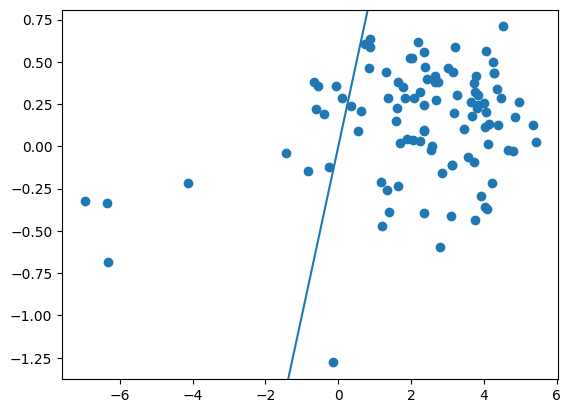

0.7269580334455905


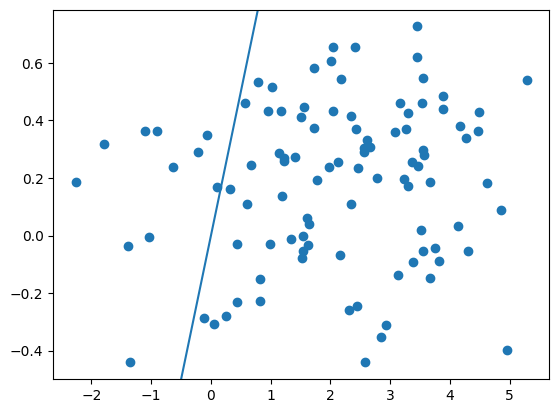

epoch 0
patience 0
train mae is 3.038285089436012
test mae is 2.4767740602706922
train coverage is 1.0
train width is 22.969886886973676
test coverage is 1.0
test width is 22.488124192048364
drugs weight is 0.4746817004372053
train Pearson is 0.26589997455076414
test Pearson is 0.13203700528886517
1.3919065311046


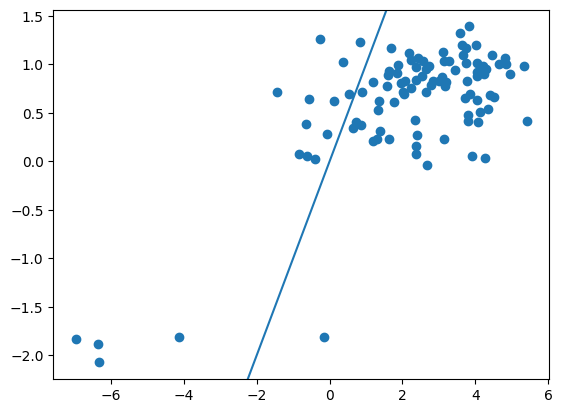

1.362068182588481


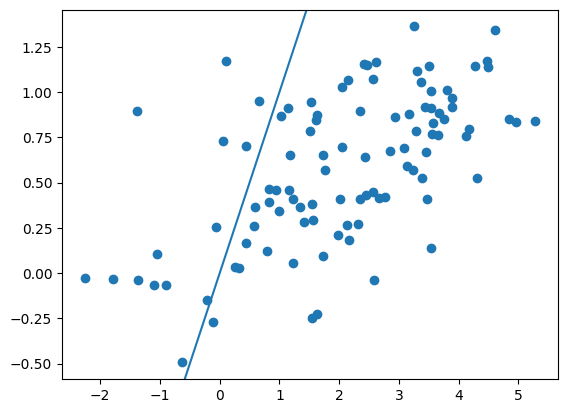

epoch 1
patience 1
train mae is 2.464003374841896
test mae is 2.051213579160284
train coverage is 1.0
train width is 15.757074832829819
test coverage is 1.0
test width is 15.943447478275434
drugs weight is 0.4581954278200107
train Pearson is 0.7138324165721379
test Pearson is 0.5993745930787531
1.9042122371327013


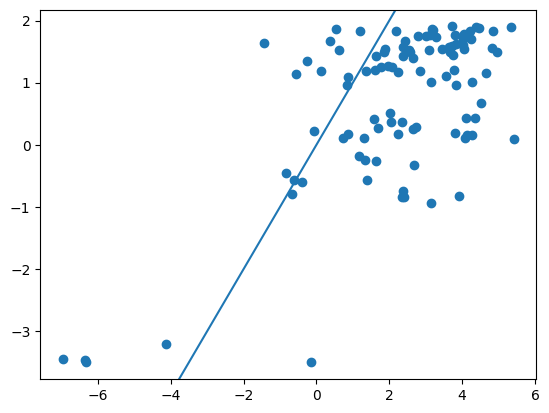

1.965214320247413


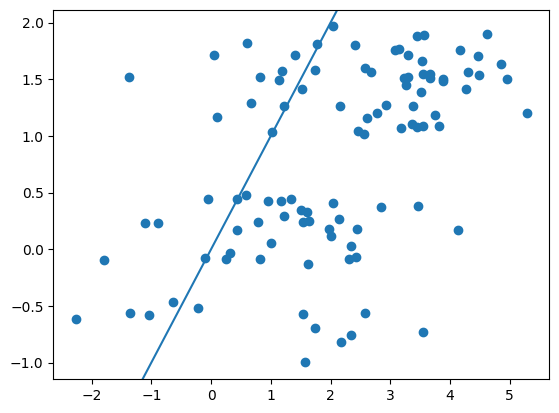

epoch 2
patience 0
train mae is 2.281456458996311
test mae is 1.9029906438237856
train coverage is 0.99
train width is 11.636252762997401
test coverage is 1.0
test width is 12.050908582999513
drugs weight is 0.491087127348768
train Pearson is 0.6607146173560112
test Pearson is 0.48934040261140244
3.279567690942074


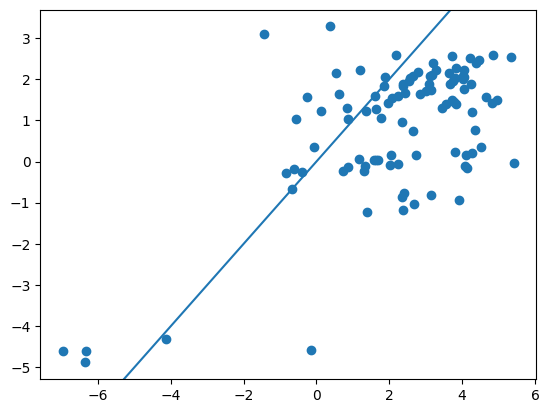

3.3573100958459206


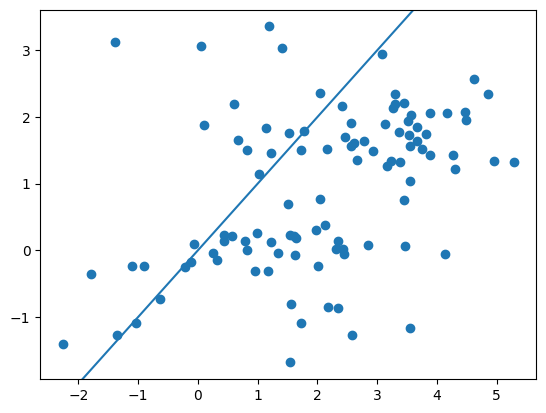

epoch 3
patience 0
train mae is 2.2239341295674224
test mae is 1.9313486117244087
train coverage is 1.0
train width is 10.884197651147938
test coverage is 1.0
test width is 11.31792622294088
drugs weight is 0.5209199731862176
train Pearson is 0.6375175349163639
test Pearson is 0.4243909317073656
2.81076178355879


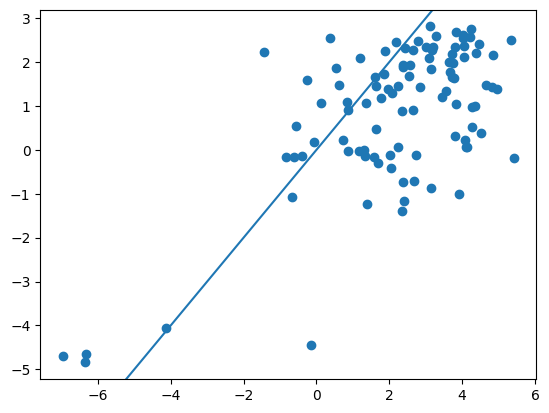

2.9638930136299164


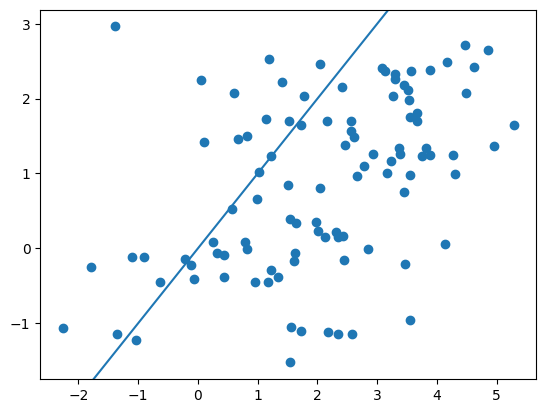

epoch 4
patience 0
train mae is 2.165887646910111
test mae is 1.916603103434997
train coverage is 0.97
train width is 9.985158392219752
test coverage is 0.99
test width is 10.48708357345556
drugs weight is 0.5218106763018544
train Pearson is 0.665848146493809
test Pearson is 0.46300612065224545
4.038283107045146


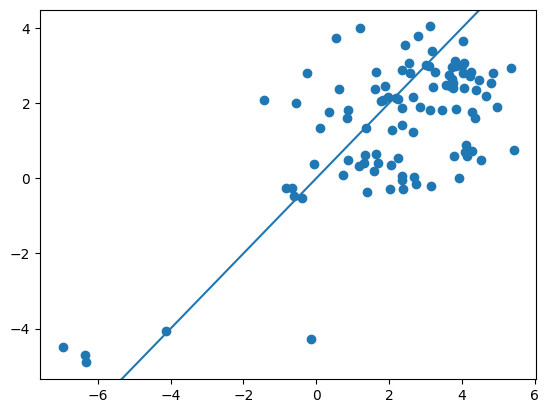

3.458532103715461


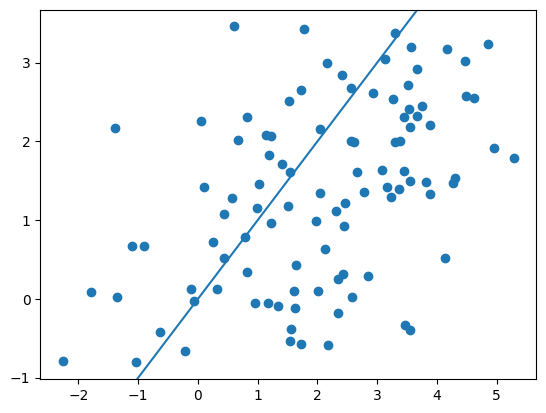

epoch 5
patience 0
train mae is 1.8771236225170465
test mae is 1.653689169950736
train coverage is 1.0
train width is 9.427569593469585
test coverage is 1.0
test width is 9.945259083918632
drugs weight is 0.5238750840388355
train Pearson is 0.6745151262562542
test Pearson is 0.4700075573889787
3.6762302173806853


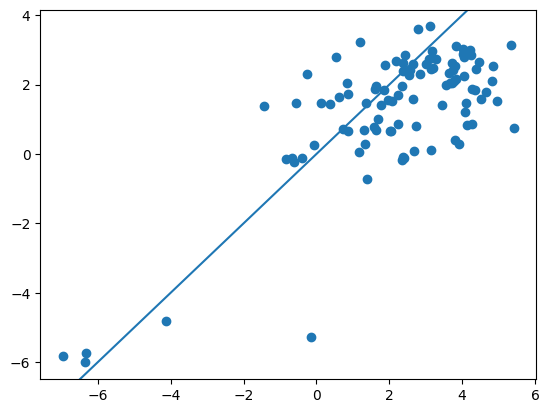

3.217549720683409


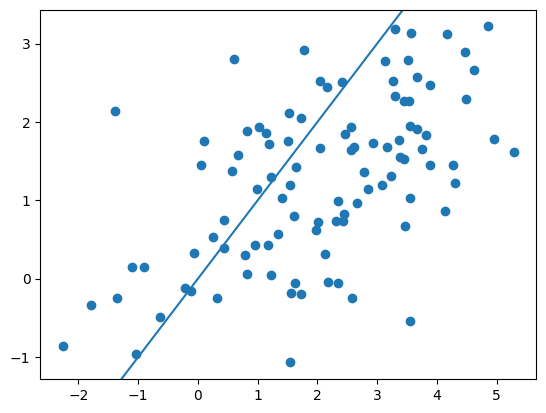

epoch 6
patience 0
train mae is 1.7547929291763755
test mae is 1.5808668825539813
train coverage is 0.98
train width is 7.69492244344546
test coverage is 0.99
test width is 8.119352264180849
drugs weight is 0.5231201586064868
train Pearson is 0.7489954161367803
test Pearson is 0.5547447529696802
4.107668642988925


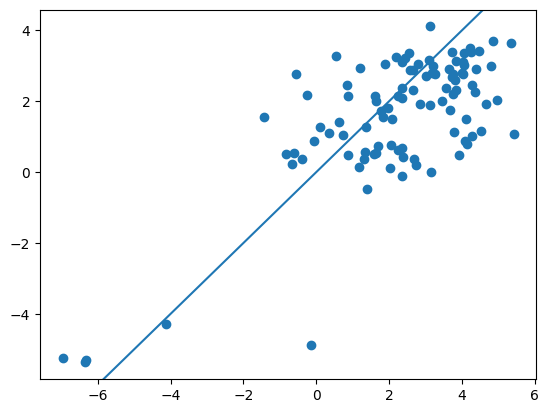

3.504671088277878


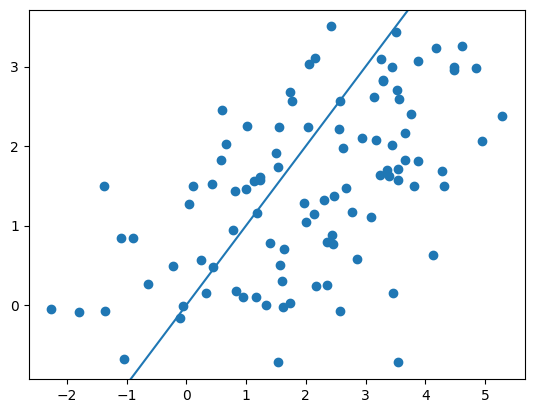

epoch 7
patience 0
train mae is 1.6826473701162266
test mae is 1.5125489024289942
train coverage is 0.95
train width is 6.855853812288066
test coverage is 0.98
test width is 7.214707964807267
drugs weight is 0.5267124564890057
train Pearson is 0.7358752210193975
test Pearson is 0.5388135296264857
4.091320919131682


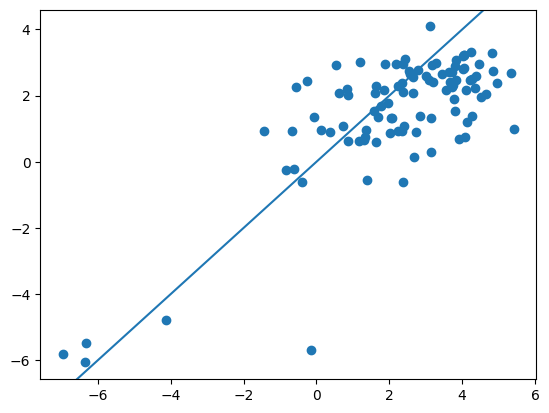

3.3257214877743486


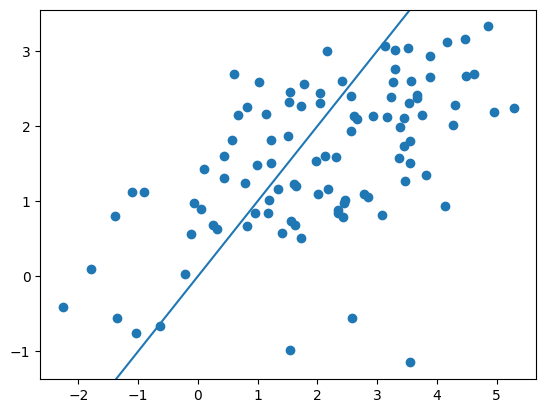

epoch 8
patience 0
train mae is 1.632667259963882
test mae is 1.4335775844719736
train coverage is 0.94
train width is 5.96240985900379
test coverage is 0.95
test width is 6.21560504073603
drugs weight is 0.5266344490409249
train Pearson is 0.7636416814923792
test Pearson is 0.5652103141322673
3.636131552557816


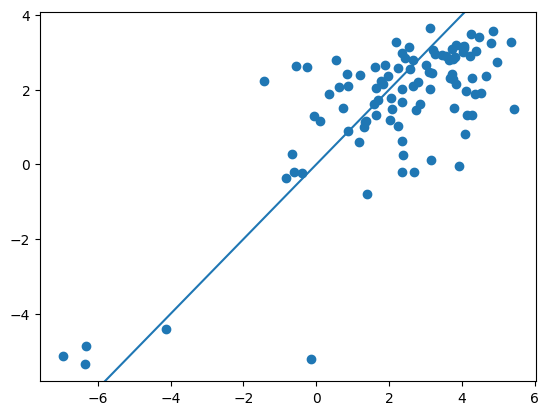

3.1749212327582494


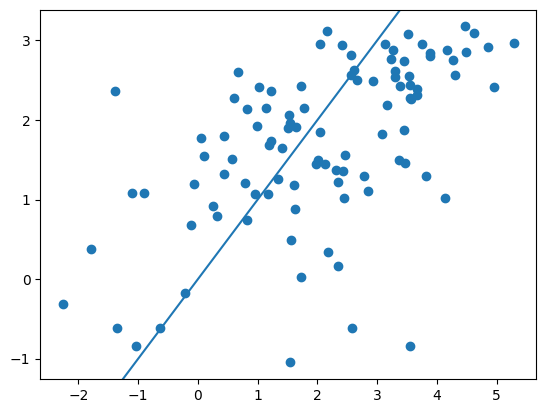

epoch 9
patience 0
train mae is 1.615409032707891
test mae is 1.3966354816361801
train coverage is 0.8
train width is 4.1711760422713855
test coverage is 0.87
test width is 4.2735116439125305
drugs weight is 0.5212743244104336
train Pearson is 0.7470978230009251
test Pearson is 0.5597210615741502
3.995528124838115


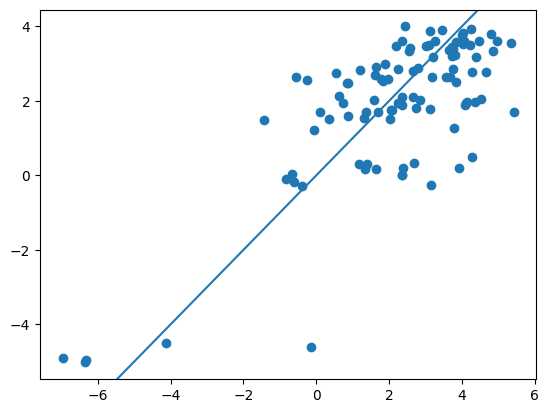

3.789362010388315


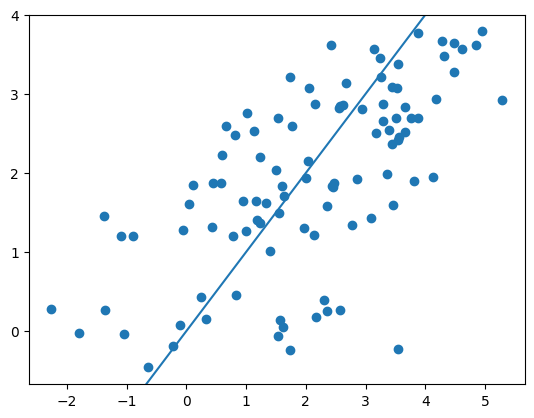

epoch 10
patience 0
train mae is 1.5292544929771572
test mae is 1.255955655570727
train coverage is 0.77
train width is 3.3982813432231067
test coverage is 0.79
test width is 3.470298924425722
drugs weight is 0.5197377752713063
train Pearson is 0.7571033931086559
test Pearson is 0.643955894377094
3.9462191004727583


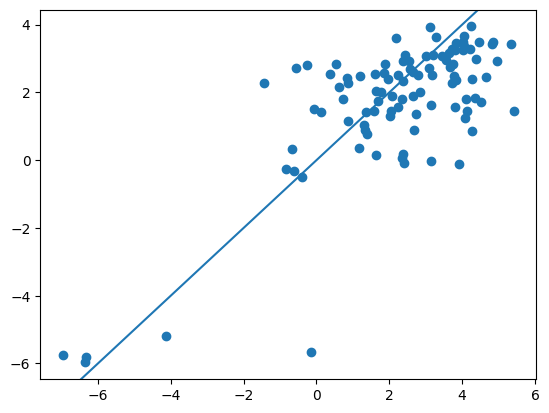

3.685578204200956


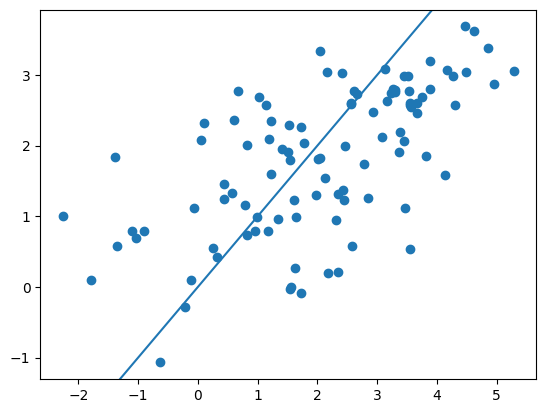

epoch 11
patience 0
train mae is 1.6052160901075494
test mae is 1.2958639729587773
train coverage is 0.68
train width is 2.8185001292490357
test coverage is 0.7
test width is 2.8217258913157304
drugs weight is 0.5208614687363771
train Pearson is 0.7504503336666443
test Pearson is 0.6233699187171403
3.637491769477138


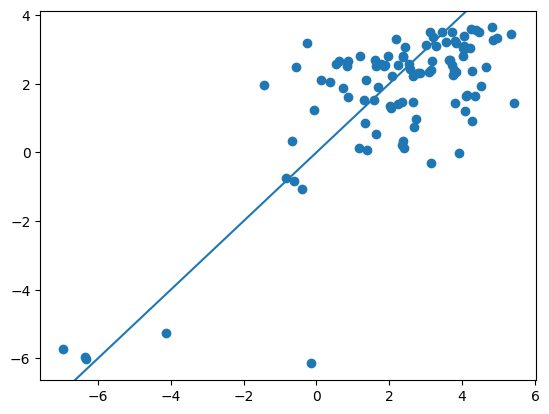

3.5549155658646194


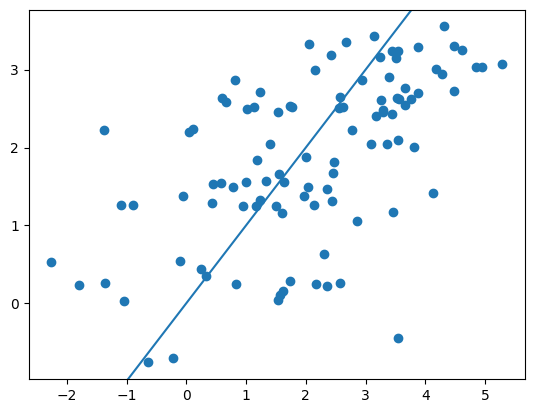

epoch 12
patience 1
train mae is 1.642422381829186
test mae is 1.3504147908066007
train coverage is 0.59
train width is 2.555456327801171
test coverage is 0.59
test width is 2.5455458576039156
drugs weight is 0.5223882385207209
train Pearson is 0.7422780828955358
test Pearson is 0.5758656073824074
4.410190018317026


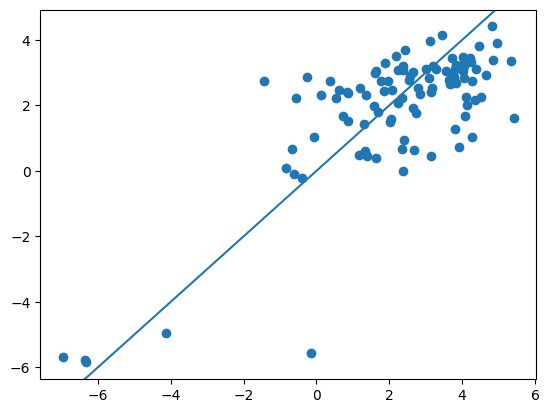

3.9189418954339605


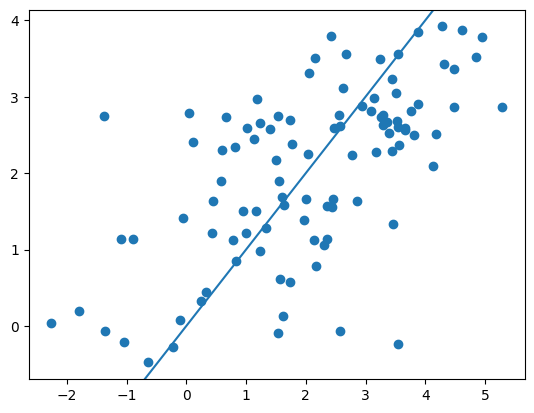

epoch 13
patience 2
train mae is 1.5238948202915736
test mae is 1.2860115327902326
train coverage is 0.6
train width is 2.400414341958554
test coverage is 0.62
test width is 2.3196448714849476
drugs weight is 0.5247135647513239
train Pearson is 0.7615010435187328
test Pearson is 0.6174891191940105
3.957593431631448


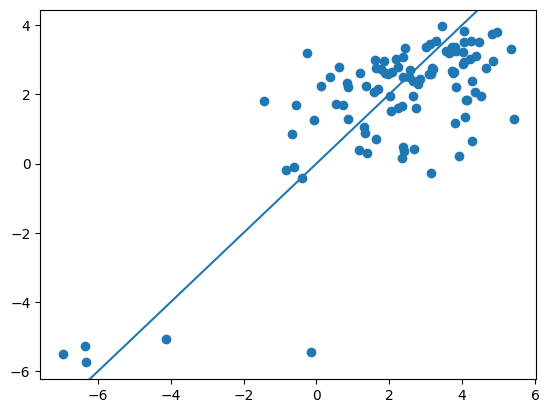

3.6646983986956347


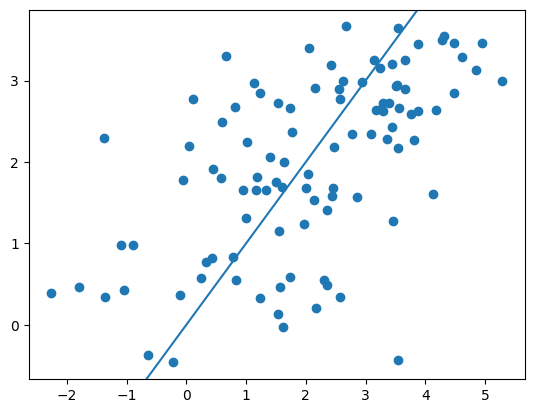

epoch 14
patience 3
train mae is 1.5735468420537968
test mae is 1.3341248167853486
train coverage is 0.57
train width is 2.279121667359046
test coverage is 0.55
test width is 2.224734671382769
drugs weight is 0.5257793099620789
train Pearson is 0.7500883666892407
test Pearson is 0.581420685355554


KeyboardInterrupt: 

In [87]:
best_train_mae, best_test_mae, best_train_coverage, best_train_width, best_test_coverage, best_test_width,  exit_iter_no_thresh, time_taken, best_test_preds = rep_one_real_world(0)

In [82]:
# best_train_mae, best_test_mae, best_train_coverage, best_train_width, best_test_coverage,  best_test_width

In [83]:
# best_test_preds.shape

In [84]:
# np.sqrt(np.mean(y_test.reshape(-1,1)- best_test_preds.mean(0))**2)

In [85]:
# best_test_preds.mean(0).shape

In [86]:
# plt.scatter(y_test.reshape(-1,1), best_test_preds.mean(0))

In [87]:
# np.sqrt(np.mean((y_test-best_test_preds.mean(0))**2))

In [88]:
# best_test_preds.mean(0)

In [89]:
catch_coverages = Parallel(n_jobs=10, verbose = 10, backend = "loky")(delayed(rep_one_real_world)(i) for i in range(0,10))

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.


1.3152172528119468 0.91 4.967546447805052
1.617575967748995 0.78 3.870396224454047
1.195289300578225 0.81 2.9692397657666025


[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed: 12.9min remaining: 30.0min


1.5672720785167098 0.69 3.4824970747497845
1.4827264029000944 0.87 3.8308523969223645


[Parallel(n_jobs=10)]: Done   5 out of  10 | elapsed: 13.5min remaining: 13.5min


1.3999649686368485 0.58 2.528066789635416
1.5583653606532517 0.78 3.6859421173942946


[Parallel(n_jobs=10)]: Done   7 out of  10 | elapsed: 14.9min remaining:  6.4min


1.5202251597675884 0.71 2.892696722675103
1.8798553613351872 0.55 2.676712613367257
1.2589880544070617 0.84 3.77070482970302


[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed: 20.7min finished


In [90]:
# string = "Real_World_EnKF_DeepCDR_" + "Neurons_" + str(h1)  + "_Gamma_" +  str(gamma_param) +  "_var_weights_" + str(var_weights) + "_num_ens_" + str(size_ens)

In [91]:
string = "Real_World_EnKF_DeepCDR_" + "Neurons_" + str(h1)  + "_Gamma_" +  str(gamma_param) +  "_var_weights_" + str(var_weights) + "_num_ens_" + str(size_ens)

In [92]:
string

'Real_World_EnKF_DeepCDR_Neurons_16_Gamma_500_var_weights_0.5_num_ens_801'

In [93]:
with open(string + ".pkl", 'wb') as f:
    pickle.dump(catch_coverages, f)

In [94]:
# catch_coverages

In [95]:
check = pd.DataFrame(catch_coverages).iloc[:,:-1]

In [96]:
# check

In [97]:
# check

In [98]:
# check.columns = ["train_mae", "test_mae", "avg_ci_width_train", "avg_ci_width_test", "avg_lstm_weight", "exit_iter", "exit_status"]

In [99]:
check

,0,1,2,3,4,5,6,7,8
0,1.637000,1.258988,0.76,3.760442,0.84,3.770705,0.521241,11,19.916667
1,1.450986,1.558365,0.84,3.760387,0.78,3.685942,0.476764,5,14.050000
2,1.610686,1.482726,0.77,3.799107,0.87,3.830852,0.522167,5,12.716667
3,1.256721,1.520225,0.76,2.877286,0.71,2.892697,0.523828,7,14.683333
4,1.285272,1.879855,0.76,2.770519,0.55,2.676713,0.532824,9,19.283333
5,1.456949,1.617576,0.81,3.759228,0.78,3.870396,0.487134,4,10.683333
6,1.371291,1.567272,0.80,3.548651,0.69,3.482497,0.520071,5,12.733333
7,1.243705,1.195289,0.81,2.847902,0.81,2.969240,0.485557,6,12.050000
8,0.996683,1.399965,0.81,2.564403,0.58,2.528067,0.486755,7,13.383333
9,2.755754,1.315217,0.77,4.697742,0.91,4.967546,0.521467,5,9.266667


In [100]:
# check.columns = ["train_mae", "test_mae", "train_coverage", "train_width", "test_coverage", "test_width", "exit_iter", "time_taken", "avg_width_alginate"]

In [101]:
check.columns = ["train_mae", "test_mae", "train_coverage", "train_width", "test_coverage", "test_width", "drug_weight" ,"exit_iter", "time_taken"]

In [102]:
check.mean()

train_mae          1.506505
test_mae           1.479548
train_coverage     0.789000
train_width        3.438567
test_coverage      0.752000
test_width         3.467465
drug_weight        0.507781
exit_iter          6.400000
time_taken        13.876667
dtype: float64

In [103]:
check.median()

train_mae          1.411139
test_mae           1.501476
train_coverage     0.785000
train_width        3.653939
test_coverage      0.780000
test_width         3.584220
drug_weight        0.520656
exit_iter          5.500000
time_taken        13.058333
dtype: float64

In [104]:
check.mean()

train_mae          1.506505
test_mae           1.479548
train_coverage     0.789000
train_width        3.438567
test_coverage      0.752000
test_width         3.467465
drug_weight        0.507781
exit_iter          6.400000
time_taken        13.876667
dtype: float64

In [105]:
check_mean = check.mean().reset_index()

In [106]:
check_mean.to_csv("Mean_Metrics_" +  string +  ".csv", index = False)

In [107]:
check.std()

train_mae         0.477569
test_mae          0.199348
train_coverage    0.028460
train_width       0.659292
test_coverage     0.119052
test_width        0.728080
drug_weight       0.020911
exit_iter         2.170509
time_taken        3.400601
dtype: float64

In [108]:
check_std = check.std().reset_index()

In [109]:
check_std.to_csv("Std_Metrics_" + string +  ".csv", index = False)

In [110]:
check.std()/10

train_mae         0.047757
test_mae          0.019935
train_coverage    0.002846
train_width       0.065929
test_coverage     0.011905
test_width        0.072808
drug_weight       0.002091
exit_iter         0.217051
time_taken        0.340060
dtype: float64

In [111]:
# true_preds = []
# enkf_preds = []
# for i in range(0,reps):
#     all_preds = catch_coverages[i][-1]
#     all_preds = all_preds.mean(0)
#     catch_test_probs = expit(catch1[i][2])
#     true_probs = catch_test_probs.ravel().tolist()
#     true_preds.append(true_probs)
#     enkf_preds.append(all_preds.ravel().tolist())
#     # plt.scatter(true_probs, all_preds.ravel().tolist())
#     # plt.show()

In [112]:
# true_preds = [inner for item in true_preds for inner in item]

In [113]:
# enkf_preds = [inner for item in enkf_preds for inner in item]

In [114]:
# np.mean(np.abs(np.array(true_preds)-np.array(enkf_preds)))

In [115]:
# plt.scatter(enkf_preds,true_preds, alpha=0.5)
# plt.xlabel("EnKF Predictions", fontsize = 15, fontweight = "bold")
# plt.ylabel("LSTM Predictions", fontsize = 15, fontweight = "bold")
# plt.xticks( fontsize = 10, fontweight = "bold")
# plt.yticks( fontsize = 10, fontweight = "bold")
# plt.axline((0, 0), slope=1)
# plt.show()

In [116]:
# cur_idx = 0

In [117]:
# catch_preds = []
# for i in range(0, catch_coverages[cur_idx][-1].shape[1]):
#     enkf_preds = catch_coverages[cur_idx][-1][:,i,:]
#     enkf_preds_df = pd.DataFrame(enkf_preds)
#     enkf_preds_df["Test_Sample_ID"] = i 
#     enkf_preds_df.columns = ["EnKF_Preds", "Test_Sample_ID"]
#     catch_preds.append(enkf_preds_df)

In [118]:
# catch_preds_df = pd.concat(catch_preds)

In [119]:
# import seaborn as sns

In [120]:
# filtered_df = expit(catch1[cur_idx][2])

In [121]:
# # plt.figure(figsize = (10,10))
# fig = sns.boxplot(catch_preds_df, x="Test_Sample_ID", y="EnKF_Preds", showfliers=False)
# plt.scatter(range(0, filtered_df.shape[0]), filtered_df, c = "black", s = 50)
# plt.xlabel("Test Sample ID", fontsize = 15, fontweight = "bold")
# plt.ylabel("EnKF Predictions", fontsize = 15, fontweight = "bold")
# plt.xticks(fontsize = 10, fontweight = "bold")
# plt.yticks(fontsize = 10, fontweight = "bold")
# plt.show()

In [122]:
# ids = [i for i in range(0, filtered_df.shape[0]) if filtered_df[i] < 0.5]
# ids_more = [i for i in range(0, filtered_df.shape[0]) if filtered_df[i] > 0.5]

In [123]:
# catch_preds_df.groupby("Test_Sample_ID").quantile(q = [0.025, 0.975])

In [124]:
# catch_preds_df_filtered = catch_preds_df[catch_preds_df["Test_Sample_ID"].isin(ids_more)]

In [125]:
# filtered_true = filtered_df[ids_more,:]

In [126]:
# # plt.figure(figsize = (10,10))
# fig = sns.boxplot(catch_preds_df_filtered, x="Test_Sample_ID", y="EnKF_Preds", showfliers=False)
# plt.scatter(range(0, filtered_true.shape[0]), filtered_true, c = "black", s = 50)
# plt.xlabel("Test Sample ID", fontsize = 15, fontweight = "bold")
# plt.ylabel("EnKF Predictions", fontsize = 15, fontweight = "bold")
# plt.xticks(fontsize = 10, fontweight = "bold")
# plt.yticks(fontsize = 10, fontweight = "bold")
# plt.show()

In [127]:
# catch_preds_df_filtered = catch_preds_df[catch_preds_df["Test_Sample_ID"].isin(ids)]
# filtered_true = filtered_df[ids,:]
# # plt.figure(figsize = (10,10))
# fig = sns.boxplot(catch_preds_df_filtered, x="Test_Sample_ID", y="EnKF_Preds", showfliers=False)
# plt.scatter(range(0, filtered_true.shape[0]), filtered_true, c = "black")
# plt.xlabel("Test Sample ID", fontsize = 15, fontweight = "bold")
# plt.ylabel("EnKF Predictions", fontsize = 15, fontweight = "bold")
# plt.xticks(fontsize = 10, fontweight = "bold")
# plt.yticks(fontsize = 10, fontweight = "bold")
# plt.show()
# # plt.ylim((0.9,1.0))